# EIRA: Example 2

## Tutorial: an example of risk assessment using EIRA

This example will work through a risk assessment for Costa Rica, San Jose using EIRA, This version of EIRA provides certain risk indicators based on the ovelapping of hazard and exposure files. 

### 1. Import libraries

In [1]:
# import libraries
import json                        

import os                                     
import sys                                     
sys.path.append(os.path.join( '..'))          #call the other modules as a package and use the import option. You need the other two line above.

from eira import EIRA_GIS_tools
from eira import EIRA_NotebookUserInter
from eira import EIRA_files_handler
from eira import EIRA_hazards
from eira import EIRA_risk_tools_level1
from eira.EIRA_utils import load_config

import rasterio

import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import time
from datetime import datetime

### 2. Introduction: define the country or region under analysis
This section provides EIRA the location where the analysis will be conducted.  
Using this information, EIRA will prepare and present specific threat data relevant to the study area.

- Define the country under study 
This step allows the selection of a country's boundaries. If the user prefers define a specific region boundaries, please use the following subsection. 

In [2]:
dropdown = EIRA_NotebookUserInter.create_dropdown()
selected_country_name = EIRA_NotebookUserInter.check_if_selection_changed_return_country_name(dropdown,'Country selected: ')



Dropdown(description='Select:', options=('Aruba', 'Antigua', 'Barbuda', 'Afghanistan', 'Angola', 'Anguilla', '…

Original CRS: EPSG:4326
The file is already in EPSG:4326 (EPSG:4326) CRS.
Extracted GeoDataFrame for country: Costa Rica


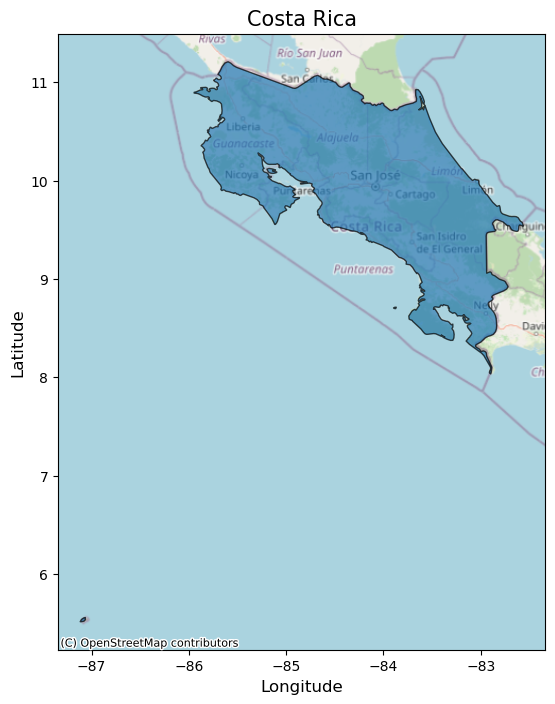

In [3]:
#Prepare and save gdf for next computations
#Extraction of the selected country
Worldmap_path = load_config()['inputs']['WorldMap_path']
gdf_shape_referential= EIRA_GIS_tools.extract_country_geodataframe(Worldmap_path,selected_country_name())
EIRA_GIS_tools.plot_vectorGIS_in_memory_plus_basemap(gdf_shape_referential, selected_country_name(),use_basemap=True)

- Define a customized region under study. 
If user did not select a country under study in the previous subsection, In this section, you can enter the path of a shape or vector file related to the region under study. If you already selected a country as s region under study, please jump this section. 

In [ ]:
#File path of the referential map of the country or region under study
shape_file_path_ref = '/root/WB/EIRA_tool/EIRA/eira/input_data/CostaRica/gadm36_CRI_shp/SanJose_municipality.shp'

#Plot
gdf_shape_referential = EIRA_GIS_tools.read_and_reproject_vector_file(shape_file_path_ref)
EIRA_GIS_tools.plot_vectorGIS_in_memory_plus_basemap(gdf_shape_referential, "San Jose",use_basemap=True)

### 3. Exposure Module
The concept of exposure relates to the nature and degree to which a system is exposed to a hazard of significant climatic variations. Exposure data can include a variety of indicators that are used to represent the value exposed to a disaster impact. In this sense, any data representing a potential receptor of risk can be considered exposure data.
 

#### 3.1 Read and Plot the exposure files to be analyzed


Exposured file Read and Validated:
SUBESTACION_AM_CNFL_FVU_WGS84-PROV-FINAL_Type-point
Lineas_Aereas_FVU_WGS84-PROV-FINAL_Type-linestring
Lineas_Aereas_FVU_WGS84-PROV-FINAL_Type-multilinestring
PLANTAS_GENERACION_CNFL_FVU_WGS84-PROV-FINAL_Type-point
Lineas_Subterraneas_FVU_WGS84-PROV-FINAL_Type-linestring
Lineas_Subterraneas_FVU_WGS84-PROV-FINAL_Type-multilinestring


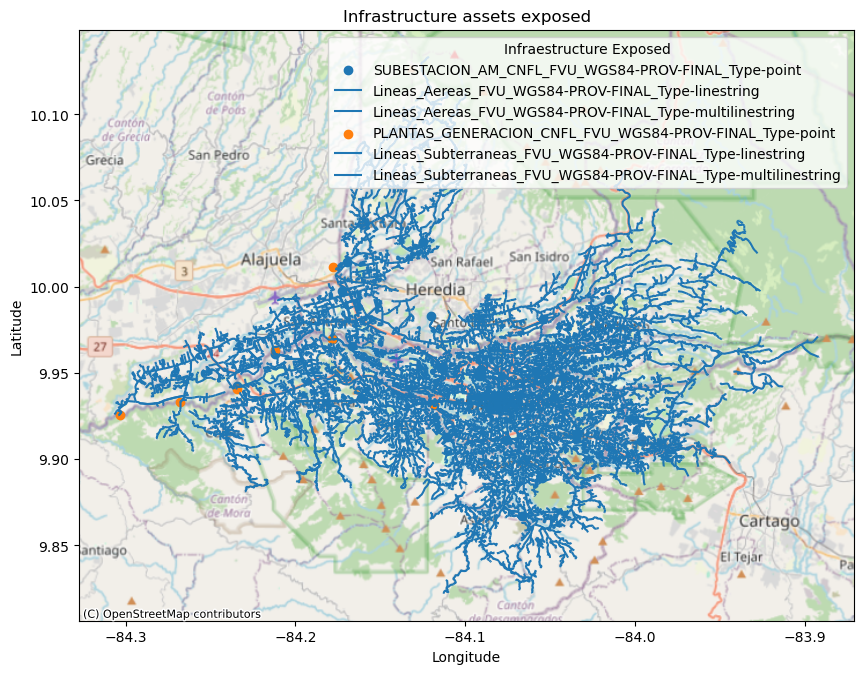

In [4]:
# File path of the folder where are all the GIS files (in vector format: shp, gpkg, GeoJSON, etc) of the exposed infraestructure assets 
folder_path = '/root/WB/EIRA_tool/EIRA/eira/input_data/CostaRica/EnergyInfraestruture/3. CNFY_ICE'  # Replace with your folder path

geo_dataframes = EIRA_GIS_tools.extract_gdf_by_geometries_from_geofiles(folder_path)
EIRA_GIS_tools.plot_geodataframes_exposed_with_basemap_from_dic(geo_dataframes)

### 4. Hazard Module
Natural events (including extreme events and long term phenomena) are termed hazards when they have the potential to cause property damage (GFDRR, 2024). Anthropic processes such as urbanization, environmental degradation and climate change can influence the location, occurrence frequency and intensity of natural hazards.


#### Droughts

 - Available models

In [5]:
#Models availables
drg = EIRA_hazards.Droughts()
models_list = list(drg.DROUGHT_HAZARD_MODELS_AVAILABLES.keys())
drg.print_hazard_models_available(models_list)


Initialized drought class
Available Hazard Models:
- GIRI Drought hazard SMA 25-year return period - Existing climate
- GIRI Drought hazard SPI-6 25-year return period - Existing climate
- GIRI Drought hazard SSI 25-year return period - Existing climate
- GIRI Average duration of a drought event (SPI-6) - Existing climate
- GIRI Number of drought events in the analysed period (SPI-6) - Existing climate
- GIRI Drought hazard SMA 25-year return period - SSP1 Lower bound
- GIRI Drought hazard SPI-6 25-year return period - SSP1 Lower bound
- GIRI Drought hazard SSI 25-year return period - SSP1 Lower bound
- GIRI Average duration of a drought event (SPI-6) - SSP1 Lower bound
- GIRI Number of drought events in the analysed period (SPI-6) - SSP1 Lower bound
- GIRI Drought hazard SMA 25-year return period - SSP5 Upper bound
- GIRI Drought hazard SPI-6 25-year return period - SSP5 Upper bound
- GIRI Drought hazard SSI 25-year return period - SSP5 Upper bound
- GIRI Average duration of a drought

- Select the Drought hazard model

In [6]:
#Select a Drought hazard model to 
Selected_Drought_model= 'GIRI Drought hazard SMA 25-year return period - Existing climate'

- Prepare the selected hazard model

The file 'GIRI Drought hazard SMA 25-year return period - Existing climate.tif' already exists in the local database.
/root/WB/EIRA_tool/EIRA/eira/input_data/DataBases/Drought/GIRI Drought hazard SMA 25-year return period - Existing climate.tif


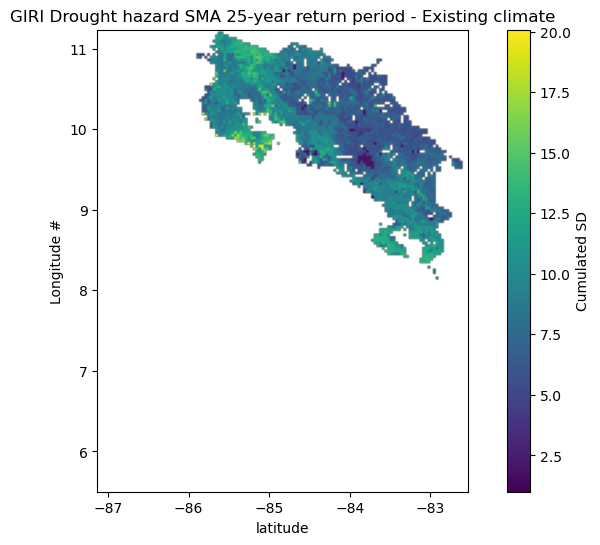

Ok


In [7]:
# Prepare the selected hazard model 
raster_drought_region = drg.Download_and_Prepare_hazard_model(Selected_Drought_model, gdf_shape_referential, drg.DROUGHT_HAZARD_MODELS_AVAILABLES[Selected_Drought_model][0],
                                      drg.Drought_folder_hazard_to_save,
                                      drg.DROUGHT_HAZARD_MODELS_AVAILABLES[Selected_Drought_model][2])
                                      

### 5. Impact and Risk Assessment
In this version of EIRA, Risk indicators are computed based based on the overlapping of hazard and exposure files. Thus, risk indicator will be given in terms of the number or percentages of assets or population exposed to different level of hazard. The level of hazard are given according to the hazard intensity used to characterize a specific phenomenon. For instance, for floods, in terms of flood depth, for earthquakes, in terms of the peak ground motion acceleration. 

#### Risk Analysis of Droughts

Starting EIRA Risk analysis level 1.................................................
EIRA results, risk analysis level 1 for the exposure : SUBESTACION_AM_CNFL_FVU_WGS84-PROV-FINAL_Type-point 
Progressing risk results......................................


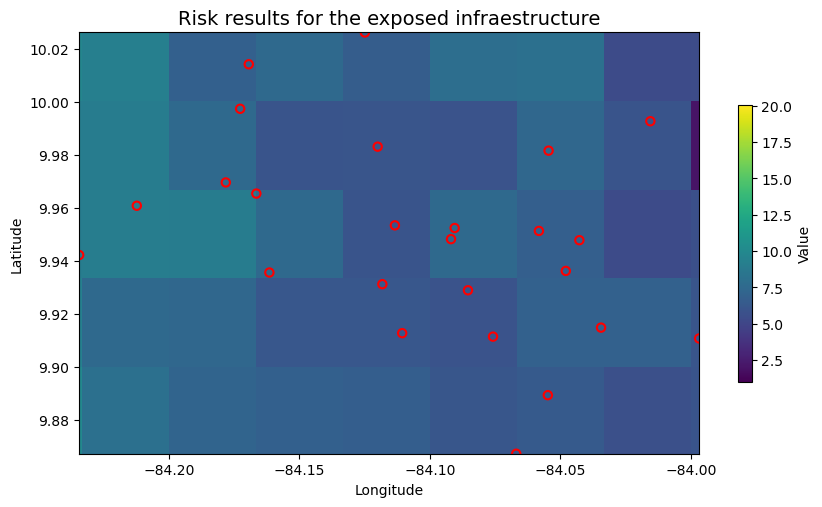

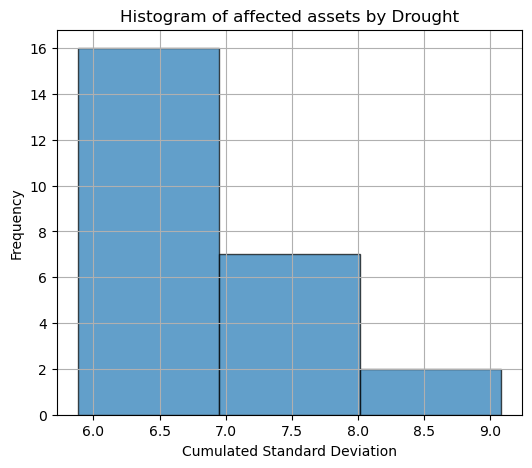

Table-Histogram (frequency table) for column 'pixel_value':
  pixel_value Range  Frequency  Relative Frequency
0    (5.881, 6.949]         16                0.64
1    (6.949, 8.014]          7                0.28
2    (8.014, 9.079]          2                0.08
 Total element exposed: 25
Percentage of assets affected : 100.0 % 
Number of elements not affected : 0
Total affected elements: 25


---------------------------------------------------------------------------
EIRA results, risk analysis level 1 for the exposure : Lineas_Aereas_FVU_WGS84-PROV-FINAL_Type-linestring 
Progressing risk results......................................


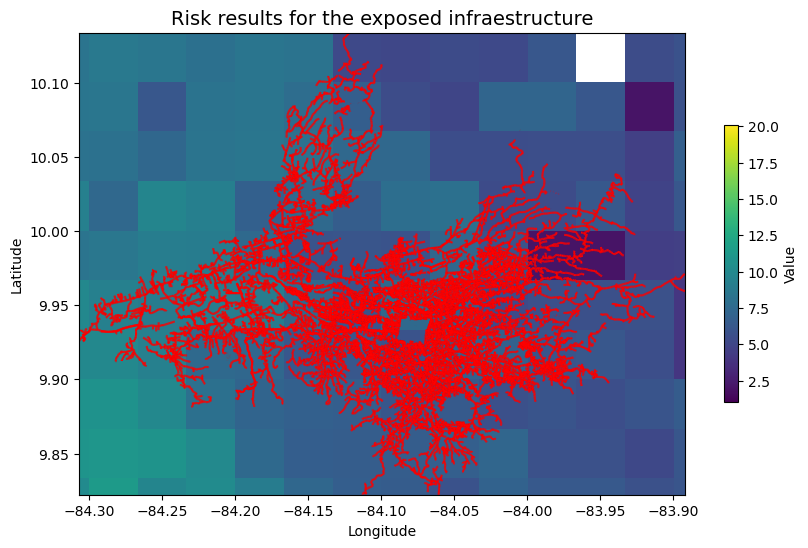

Total length exposed : 15648.853431394751 Km
Percentage of assets affected: 100.0 % 
Total length not affected : 0.006489211686130147 Km
Total length affected: 15648.846942183065 Km


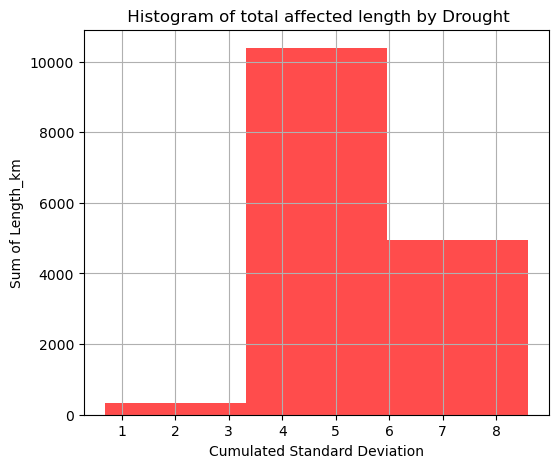

      Bin Range  Sum of Longitude  Distribution of the affected length
0  [2.00, 4.64)        323.700809                             0.020685
1  [4.64, 7.27)      10383.040741                             0.663502
2  [7.27, 9.91)       4942.105392                             0.315813
---------------------------------------------------------------------------
EIRA results, risk analysis level 1 for the exposure : Lineas_Aereas_FVU_WGS84-PROV-FINAL_Type-multilinestring 
Progressing risk results......................................
Unsupported geometry type: multilinestring for key Lineas_Aereas_FVU_WGS84-PROV-FINAL_Type-multilinestring
---------------------------------------------------------------------------
EIRA results, risk analysis level 1 for the exposure : PLANTAS_GENERACION_CNFL_FVU_WGS84-PROV-FINAL_Type-point 
Progressing risk results......................................


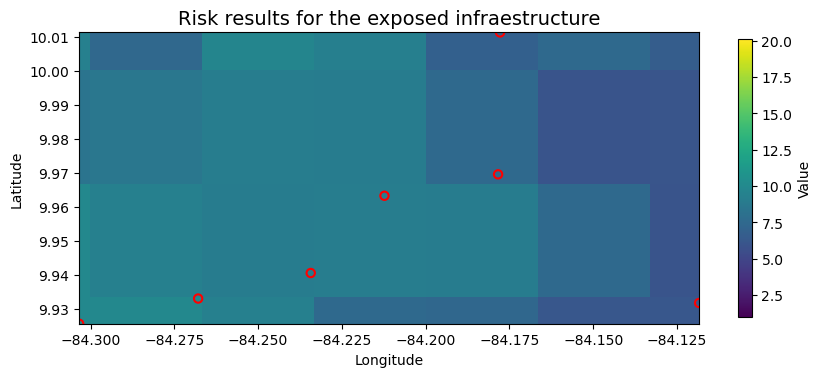

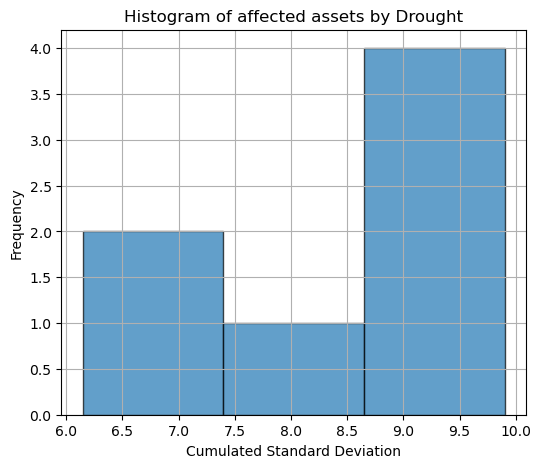

Table-Histogram (frequency table) for column 'pixel_value':
  pixel_value Range  Frequency  Relative Frequency
0    (6.142, 7.399]          2            0.285714
1    (7.399, 8.653]          1            0.142857
2    (8.653, 9.906]          4            0.571429
 Total element exposed: 7
Percentage of assets affected : 100.0 % 
Number of elements not affected : 0
Total affected elements: 7


---------------------------------------------------------------------------
EIRA results, risk analysis level 1 for the exposure : Lineas_Subterraneas_FVU_WGS84-PROV-FINAL_Type-linestring 
Progressing risk results......................................


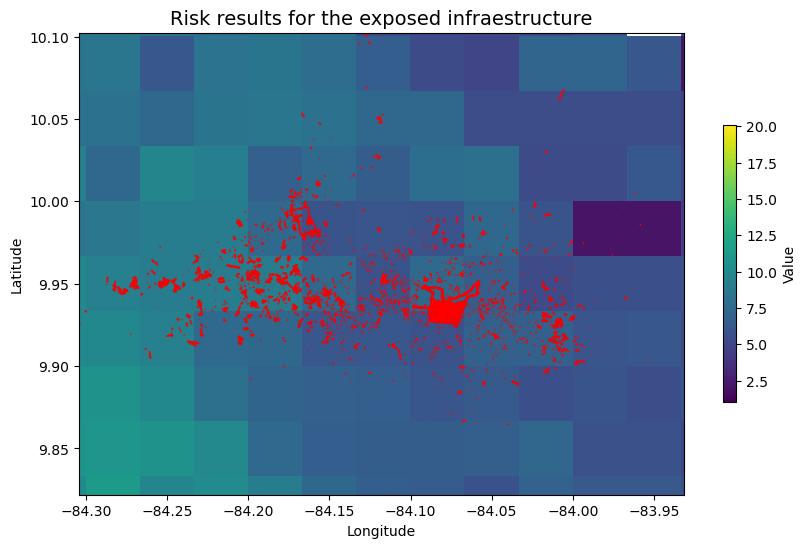

Total length exposed : 2441.2028510025716 Km
Percentage of assets affected: 100.0 % 
Total length not affected : 0.0 Km
Total length affected: 2441.2028510025716 Km


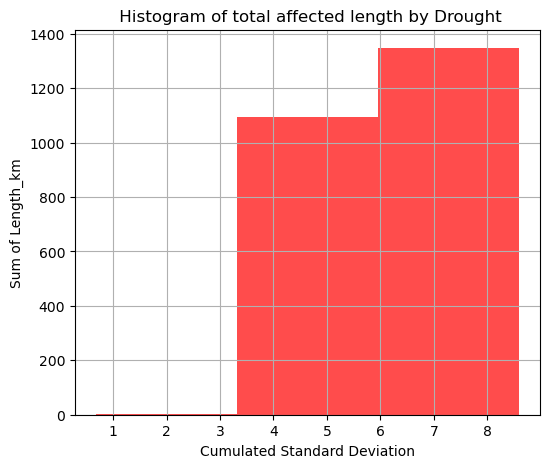

      Bin Range  Sum of Longitude  Distribution of the affected length
0  [2.00, 4.64)          1.156019                             0.000474
1  [4.64, 7.27)       1092.985089                             0.447724
2  [7.27, 9.91)       1347.061742                             0.551802
---------------------------------------------------------------------------
EIRA results, risk analysis level 1 for the exposure : Lineas_Subterraneas_FVU_WGS84-PROV-FINAL_Type-multilinestring 
Progressing risk results......................................
Unsupported geometry type: multilinestring for key Lineas_Subterraneas_FVU_WGS84-PROV-FINAL_Type-multilinestring
---------------------------------------------------------------------------


In [8]:
#Fill hazard data avaiable in EIRA database
EIRA_risk_tools_level1.Fill_hazard_classification_expert_criteria()
Classif_range = EIRA_risk_tools_level1.Drought_exp_criteria_hazard.classification_range_intensity_1
hazard_int_used = EIRA_risk_tools_level1.Drought_exp_criteria_hazard.hazard_intensity_1

#Compute histograms
risk_results_drought = EIRA_risk_tools_level1.perfom_EIRA_risk_analysis_level1(geo_dataframes,raster_drought_region,'Drought', hazard_int_used)

# Use expert criteria tu define a qualitative scale of hazard intensity
#EIRA_risk_tools_level1.Use_expert_criteria_for_qualitative_classify_hazard_levels(frequency_table_drought,Classif_range)
#print (f"Ranges of referential hazard levels. {Classif_range}")

#### Floods

- Available models

In [ ]:
#Models availables
fls = EIRA_hazards.Floods() 
models_list = list(fls.FLOOD_HAZARD_MODELS_AVAILABLES.keys())
fls.print_hazard_models_available(models_list)

- Select the Flood hazard model

In [ ]:
#Select a Flood hazard model to 
Selected_Flood_model= 'Aqueduct_Riverine_Baseline_historical_watch1980_rp_250year'

- Prepare the selected hazard model database

In [ ]:
# Prepare the selected hazard model 
raster_flood_region = fls.Download_and_Prepare_hazard_model(Selected_Flood_model,gdf_shape_referential,fls.FLOOD_HAZARD_MODELS_AVAILABLES[Selected_Flood_model][0],
                                                            fls.Floods_folder_hazard_to_save,
                                                            fls.FLOOD_HAZARD_MODELS_AVAILABLES[Selected_Flood_model][2])

#### Risk Analysis of Floods

In [ ]:
#Fill hazard data avaiable in EIRA database
EIRA_risk_tools_level1.Fill_hazard_classification_expert_criteria()
Classif_range = EIRA_risk_tools_level1.Flood_exp_criteria_hazard.classification_range_intensity_1
hazard_int_used = EIRA_risk_tools_level1.Flood_exp_criteria_hazard.hazard_intensity_1

#Compute histograms
risk_results_floods = EIRA_risk_tools_level1.perfom_EIRA_risk_analysis_level1(geo_dataframes,raster_flood_region,'Floods', hazard_int_used)


#### Landslide

In [ ]:
#Models availables
Landsld = EIRA_hazards.Landslide()
models_list = list(Landsld.LANDSLIDE_HAZARD_MODELS_AVAILABLES.keys())
fls.print_hazard_models_available(models_list)

- Select the hazard model

In [ ]:
#Select a Landslide hazard model to 
Selected_Landslide_model= 'GIRI Susceptibility Class of Landslides Triggered By Precipitation - Existing climate'

- Prepare the selected hazard model

In [ ]:
# Prepare the selected hazard model 
raster_landslide_region = Landsld.Download_and_Prepare_hazard_model(Selected_Landslide_model,gdf_shape_referential,Landsld.LANDSLIDE_HAZARD_MODELS_AVAILABLES[Selected_Landslide_model][0],
                                                            Landsld.Landslide_folder_hazard_to_save,
                                                            Landsld.LANDSLIDE_HAZARD_MODELS_AVAILABLES[Selected_Landslide_model][2])

### Risk Analysis for Landslide

In [ ]:
#Fill hazard data avaiable in EIRA database
EIRA_risk_tools_level1.Fill_hazard_classification_expert_criteria()
Classif_range = EIRA_risk_tools_level1.Earthquake_exp_criteria_hazard.classification_range_intensity_1
hazard_int_used = EIRA_risk_tools_level1.Flood_exp_criteria_hazard.hazard_intensity_1

#Compute histograms
risk_results_landslide = EIRA_risk_tools_level1.perfom_EIRA_risk_analysis_level1(geo_dataframes,raster_landslide_region,'Landslide', hazard_int_used)

Temperature and Land Surface Temperature

- Models availables

In [ ]:
#Models availables
Temp = EIRA_hazards.Temperature() 
models_list = list(Temp.TEMPERATURE_HAZARD_MODELS_AVAILABLES.keys())
Temp.print_hazard_models_available(models_list)

- Select the Hazard Model

In [ ]:
#Select a Temperature hazard model to 
Selected_Temperature_model= 'NEO_NASA_MOD_LSTD_November_2024'

- Prepare the selected hazard model

In [ ]:
# Prepare the selected hazard model 
raster_temperature_region = Temp.Download_and_Prepare_hazard_model(Selected_Temperature_model, gdf_shape_referential,
                                                                   Temp.TEMPERATURE_HAZARD_MODELS_AVAILABLES[Selected_Temperature_model][0],
                                       Temp.Temperature_folder_hazard_to_save,
                                       Temp.TEMPERATURE_HAZARD_MODELS_AVAILABLES[Selected_Temperature_model][2])

### Risk Analysis of Surface Temperature 

In [ ]:
#Fill hazard data avaiable in EIRA database
EIRA_risk_tools_level1.Fill_hazard_classification_expert_criteria()
Classif_range = EIRA_risk_tools_level1.Earthquake_exp_criteria_hazard.classification_range_intensity_1
hazard_int_used = EIRA_risk_tools_level1.Flood_exp_criteria_hazard.hazard_intensity_1

#Compute histograms
risk_results_Temperature = EIRA_risk_tools_level1.perfom_EIRA_risk_analysis_level1(geo_dataframes,raster_temperature_region,'Surface Temperature ', hazard_int_used)

### Earthquakes

- Models Availables

In [ ]:
#Models availables
EQ = EIRA_hazards.Earthquakes()
models_list = list(EQ.EQ_HAZARD_MODELS_AVAILABLES.keys())
EQ.print_hazard_models_available(models_list)

- Select the hazard model

In [ ]:
#Select a Earthquake hazard model to 
Selected_EQ_model= 'GEM_Peak Gound Acceleration PGA - 475_years'

- Prepare the select hazard model

In [ ]:
# Prepare the selected hazard model 
# Prepare the selected hazard model 
raster_EQ_region = EQ.Download_and_Prepare_hazard_model(Selected_EQ_model, gdf_shape_referential,
                                                                   EQ.EQ_HAZARD_MODELS_AVAILABLES[Selected_EQ_model][0],
                                       EQ.EQ_folder_hazard_to_save,
                                       EQ.EQ_HAZARD_MODELS_AVAILABLES[Selected_EQ_model][2])                                       

### Risk Analysis of Earhquakes

In [ ]:
#Fill hazard data avaiable in EIRA database
EIRA_risk_tools_level1.Fill_hazard_classification_expert_criteria()
Classif_range = EIRA_risk_tools_level1.Earthquake_exp_criteria_hazard.classification_range_intensity_1
hazard_int_used = EIRA_risk_tools_level1.Earthquake_exp_criteria_hazard.hazard_intensity_1

#Compute histograms
risk_results_EQ = EIRA_risk_tools_level1.perfom_EIRA_risk_analysis_level1(geo_dataframes,raster_EQ_region,'Earthquakes', hazard_int_used)

### Tropical Cyclone

 - Models Available

In [ ]:
#Models availables
TC = EIRA_hazards.TropicalCyclones_Wind()
models_list = list(TC.TROPICAL_CYCLONES_WIND_MODELS_AVAILABLES.keys())
TC.print_hazard_models_available(models_list)

 - Selection of hazard model

In [ ]:
#Select a Tropical Cyclone hazard model to 
Selected_TC_model= 'GIRI Tropical Cyclone Wind CC - 250 years'

In [ ]:
# Prepare the selected hazard model 
raster_TC_region = TC.Download_and_Prepare_hazard_model(Selected_TC_model, gdf_shape_referential,
                                                                   TC.TROPICAL_CYCLONES_WIND_MODELS_AVAILABLES[Selected_TC_model][0],
                                       TC.TC_wind_folder_hazard_to_save,
                                       TC.TROPICAL_CYCLONES_WIND_MODELS_AVAILABLES[Selected_TC_model][2])         